In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import xgboost as xgb
import statsmodels.stats.api as sm

from sklearn import ensemble , cross_validation, learning_curve, metrics 
from sklearn.cross_validation import train_test_split

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error
import math


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
Train = pd.read_csv("train.csv", sep=',', header=0)

In [11]:
Train.head()


,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


qqqq 371


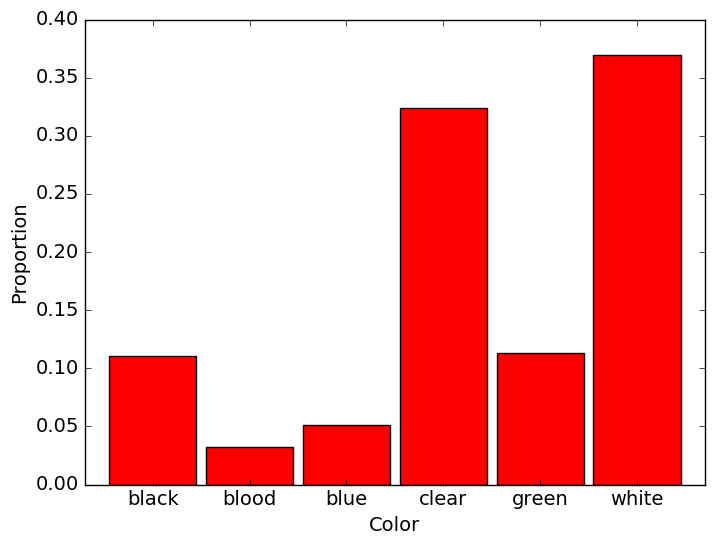

In [14]:
plt.figure(figsize(8,6))
stat = Train.groupby('color')['color'].agg(lambda x : float(len(x))/Train.shape[0])
stat.plot(kind='bar', fontsize=14, width=0.9, color="red")
plt.xticks(rotation=0)
plt.ylabel('Proportion', fontsize=14)
plt.xlabel('Color', fontsize=14)
print ("qqqq {}".format(Train.shape[0]))


In [115]:

X_train, X_test, Y_train, Y_test = train_test_split(Train.iloc[:, Train.columns != 'type'], Train['type'], test_size=0.25, random_state=1)


In [116]:
categorical_color_train = preprocessing.LabelEncoder()

categorical_color_test = preprocessing.LabelEncoder()

In [121]:
#to convert into numbers

X_train.color = categorical_color_train.fit_transform(X_train.color)

X_test.color = categorical_color_test.fit_transform(X_test.color)

In [90]:
n_trees = list(range(1, 100, 2) )

In [66]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = cross_validation.cross_val_score(estimator, X_train, Y_train, 
                                             scoring = 'accuracy', cv = 5)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

CPU times: user 1min 2s, sys: 40 ms, total: 1min 2s
Wall time: 1min 2s


In [67]:


scoring

matrix([[ 0.56140351,  0.69642857,  0.63636364,  0.56363636,  0.63636364],
        [ 0.64912281,  0.64285714,  0.67272727,  0.58181818,  0.65454545],
        [ 0.57894737,  0.64285714,  0.69090909,  0.70909091,  0.65454545],
        [ 0.63157895,  0.57142857,  0.70909091,  0.70909091,  0.65454545],
        [ 0.61403509,  0.67857143,  0.76363636,  0.69090909,  0.65454545],
        [ 0.66666667,  0.69642857,  0.72727273,  0.69090909,  0.65454545],
        [ 0.66666667,  0.69642857,  0.76363636,  0.70909091,  0.67272727],
        [ 0.70175439,  0.67857143,  0.76363636,  0.67272727,  0.67272727],
        [ 0.71929825,  0.66071429,  0.76363636,  0.70909091,  0.65454545],
        [ 0.73684211,  0.67857143,  0.8       ,  0.69090909,  0.63636364],
        [ 0.71929825,  0.67857143,  0.81818182,  0.69090909,  0.65454545],
        [ 0.71929825,  0.71428571,  0.8       ,  0.69090909,  0.65454545],
        [ 0.70175439,  0.67857143,  0.81818182,  0.70909091,  0.65454545],
        [ 0.68421053,  0.

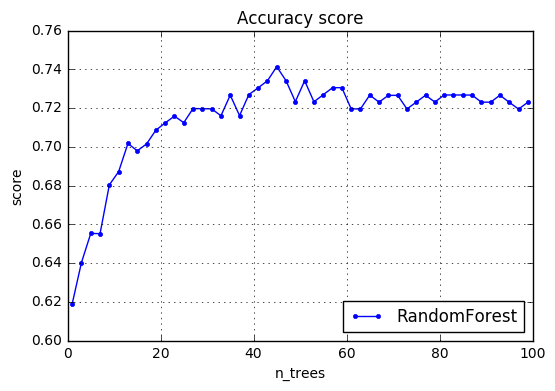

In [68]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [69]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = cross_validation.cross_val_score(estimator, X_train, Y_train, 
                                             scoring = 'accuracy', cv = 5)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

CPU times: user 30.8 s, sys: 300 ms, total: 31.1 s
Wall time: 16.1 s


In [70]:
xgb_scoring

matrix([[ 0.71929825,  0.69642857,  0.78181818,  0.74545455,  0.72727273],
        [ 0.75438596,  0.69642857,  0.78181818,  0.70909091,  0.72727273],
        [ 0.77192982,  0.69642857,  0.8       ,  0.69090909,  0.70909091],
        [ 0.73684211,  0.71428571,  0.8       ,  0.69090909,  0.72727273],
        [ 0.75438596,  0.71428571,  0.81818182,  0.69090909,  0.72727273],
        [ 0.77192982,  0.71428571,  0.81818182,  0.70909091,  0.72727273],
        [ 0.77192982,  0.69642857,  0.83636364,  0.72727273,  0.72727273],
        [ 0.75438596,  0.67857143,  0.83636364,  0.72727273,  0.72727273],
        [ 0.73684211,  0.66071429,  0.81818182,  0.70909091,  0.72727273],
        [ 0.70175439,  0.67857143,  0.78181818,  0.72727273,  0.72727273],
        [ 0.70175439,  0.67857143,  0.78181818,  0.74545455,  0.72727273],
        [ 0.70175439,  0.69642857,  0.78181818,  0.74545455,  0.72727273],
        [ 0.71929825,  0.67857143,  0.78181818,  0.70909091,  0.72727273],
        [ 0.71929825,  0.

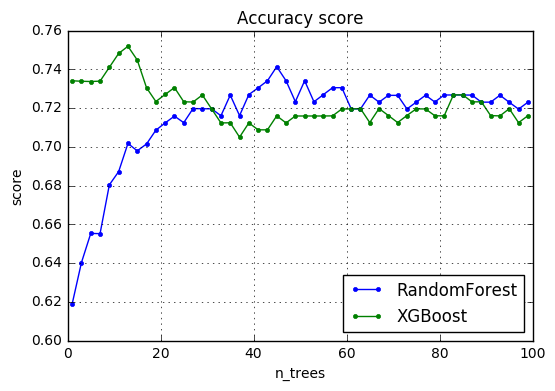

In [71]:
pylab.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pylab.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [91]:
%%time

estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=13, min_child_weight=3)
score = cross_validation.cross_val_score(estimator, X_train, Y_train, 
                                             scoring = 'accuracy', cv = 5)    

CPU times: user 304 ms, sys: 20 ms, total: 324 ms
Wall time: 243 ms


In [137]:
model_RF = ensemble.RandomForestClassifier(n_estimators = 45, min_samples_leaf=10)

In [138]:
model_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=45, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [139]:
prediction_RF = model_RF.predict(X_test)

In [140]:
prediction_RF

array(['Ghoul', 'Ghost', 'Ghost', 'Goblin', 'Ghost', 'Ghost', 'Ghoul',
       'Ghost', 'Goblin', 'Goblin', 'Goblin', 'Ghost', 'Goblin', 'Ghost',
       'Ghost', 'Ghost', 'Ghost', 'Ghost', 'Ghoul', 'Ghoul', 'Goblin',
       'Ghoul', 'Goblin', 'Ghost', 'Ghost', 'Ghoul', 'Ghost', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Ghoul', 'Ghost', 'Goblin',
       'Ghost', 'Ghost', 'Ghoul', 'Ghost', 'Ghoul', 'Ghoul', 'Ghoul',
       'Ghoul', 'Goblin', 'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghoul',
       'Ghost', 'Goblin', 'Ghost', 'Goblin', 'Ghoul', 'Ghost', 'Goblin',
       'Ghost', 'Ghoul', 'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Goblin',
       'Ghoul', 'Ghost', 'Ghoul', 'Goblin', 'Goblin', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Goblin', 'Ghoul', 'Ghost', 'Goblin', 'Ghoul',
       'Ghoul', 'Ghoul', 'Ghost', 'Goblin', 'Goblin', 'Ghost', 'Ghost',
       'Goblin', 'Goblin', 'Goblin', 'Ghost', 'Ghost', 'Ghost', 'Ghoul',
       'Ghoul', 'Ghoul'], dtype=object)

In [141]:
sum(prediction_RF == Y_test) / len(prediction_RF)

0.74193548387096775

In [74]:

#to convert back

X_test.color = categorical_color.inverse_transform(X_test.color)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields color